# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Ridwan  | Sharafadeen | Ridwan Sharafadeen, 2024.10.17 | 24 | 25 |
| Member 2: | Akinsegun | Ademiluwa | Akinsegun Ademiluwa, 2024.10.17 | 24 | 25 |
| Member 3: | Cyprain | Okafor | Cyprain Okafor, 2024.10.17 | 24 | 25 |
| Member 4: | Onyeka  | Emecheta | Onyeka Emecheta, 2024.10.17 | 24 | 25 |


# **Linear LSE**
### (40 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Curve Fitting**

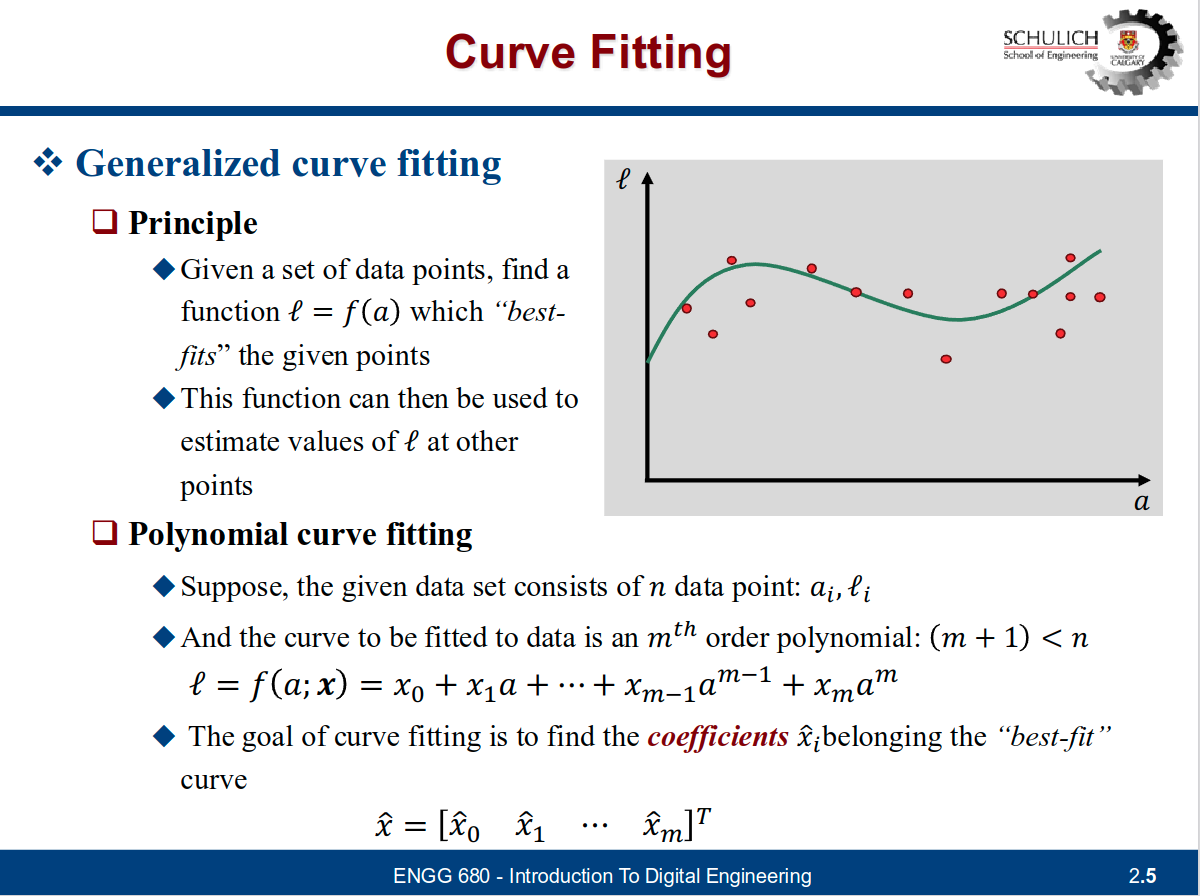

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [3]:

# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true =arr_data[:, 2]

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n =  len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


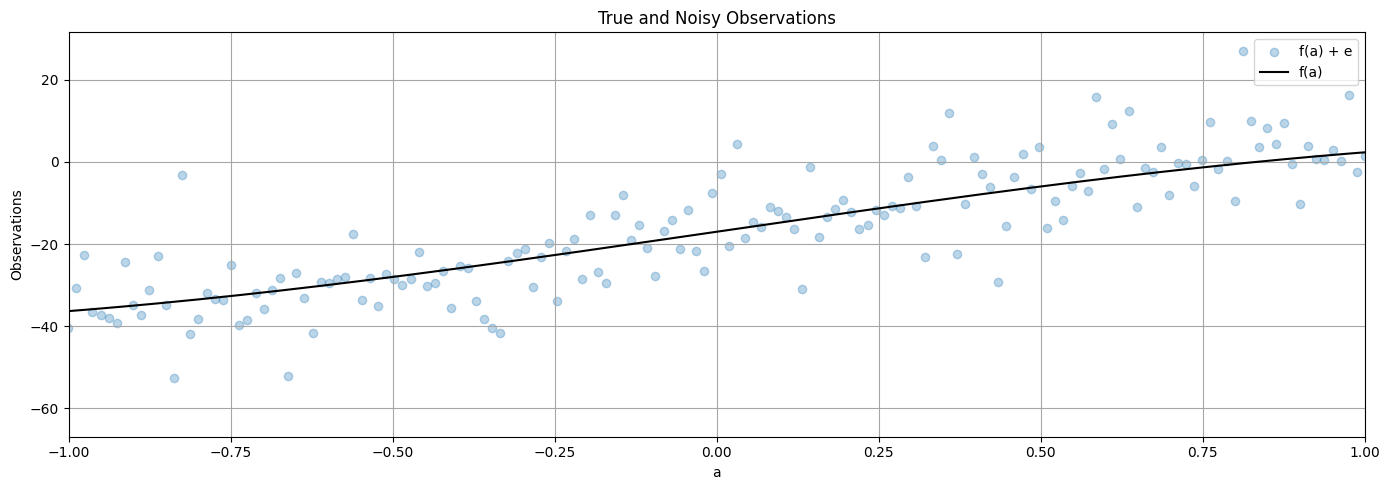

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Include axis labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True and Noisy Observations')

# Set the x-axis range from -1 to 1
ax.set_xlim(-1, 1)

# Include a legend
ax.legend()


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    A = np.zeros((len(a), deg + 1))


    a = a.T

    # Fill in the matrix with powers of a
    for i in range(len(a)):
     for j in range(deg + 1):
            A[i, j] = a[i] ** j


    # Step 2: Perform the weighted least squares estimation.
    # Calculate the normal equation: (A.T * P * A) * x = (A.T * P * l)
    AT_P = A.T @ P  # A.T * P
    N = AT_P @ A    # (A.T * P * A)
    t = AT_P @ l    # (A.T * P * l)

    # Step 3: Solve for the estimated polynomial coefficients x.
    # x is a vector of length (deg+1) containing the coefficients.
    x = np.linalg.solve(N, t)

    # Step 4: Calculate the residuals (v = A*x - l).
    v = A @ x - l

    # Step 5: Compute the a posteriori variance factor (goodness of fit).
    # apv = (v.T * P * v) / (n - (deg + 1)), where n is the number of observations.
    apv = (v.T @ P @ v) / (len(l) - (deg + 1))

    # Step 6: Compute the covariance matrix of the estimated coefficients.
    # cov_x = apv * (N^-1)
    cov_x = apv * np.linalg.inv(N)


    return (x, cov_x, apv, v)

# fit_polynomial_curve(a,l,P,3)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# Degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# Degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw =line_uw = np.polyval(x_deg1[::-1], a)
cubic_uw =cubic_uw = np.polyval(x_deg3[::-1], a)
quintic_uw =quintic_uw = np.polyval(x_deg5[::-1], a)

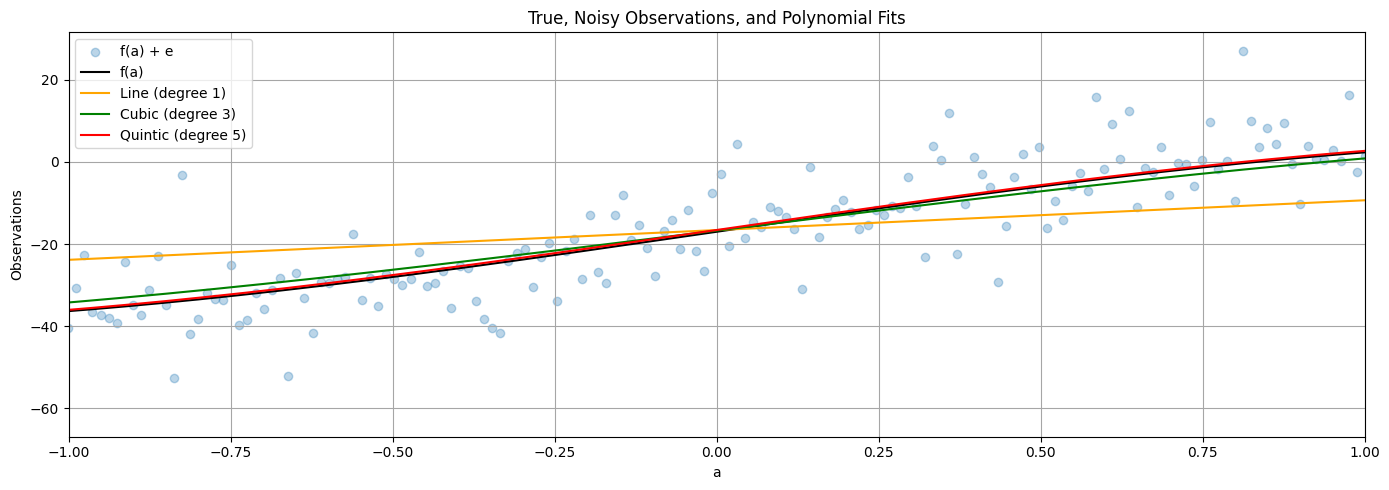

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Plot the line polynomial (degree 1) with orange color
ax.plot(a, line_uw, label="Line (degree 1)", color='orange')

# Plot the cubic polynomial (degree 3) with green color
ax.plot(a, cubic_uw, label="Cubic (degree 3)", color='green')

# Plot the quintic polynomial (degree 5) with red color
ax.plot(a, quintic_uw, label="Quintic (degree 5)", color='red')

# Include axis labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True, Noisy Observations, and Polynomial Fits')

# Set the x-axis range from -1 to 1
ax.set_xlim(-1, 1)

# Include a legend for all plots
ax.legend()



ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A Posteriori Variance Factor for Line (Degree 1):", apv_deg1)
print("A Posteriori Variance Factor for Cubic (Degree 3):", apv_deg3)
print("A Posteriori Variance Factor for Quintic (Degree 5):", apv_deg5)


A Posteriori Variance Factor for Line (Degree 1): 162.742608604322
A Posteriori Variance Factor for Cubic (Degree 3): 66.13227783131883
A Posteriori Variance Factor for Quintic (Degree 5): 63.7583446301842


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_line = np.linalg.norm(line_uw - l_true)
print("Norm between Line (Degree 1) predictions and true observations:", norm_line)

# Compute the norm between the cubic (degree 3) predictions and the true observations
norm_cubic = np.linalg.norm(cubic_uw - l_true)
print("Norm between Cubic (Degree 3) predictions and true observations:", norm_cubic)

# Compute the norm between the quintic (degree 5) predictions and the true observations
norm_quintic = np.linalg.norm(quintic_uw - l_true)
print("Norm between Quintic (Degree 5) predictions and true observations:", norm_quintic)

Norm between Line (Degree 1) predictions and true observations: 229.0601679674409
Norm between Cubic (Degree 3) predictions and true observations: 38.285979929116664
Norm between Quintic (Degree 5) predictions and true observations: 17.369967196966478


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
print("There is a clear pattern where increasing the polynomial degree leads to a reduction in both the norm and, presumably, the a posteriori variance factor. This suggests that the higher-degree polynomials provide a better approximation of the true observations.")



There is a clear pattern where increasing the polynomial degree leads to a reduction in both the norm and, presumably, the a posteriori variance factor. This suggests that the higher-degree polynomials provide a better approximation of the true observations.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

A Posteriori Variance Factor for Line (Degree 1): 12.054651233436907
A Posteriori Variance Factor for Cubic (Degree 3): 1.1444647026537131
A Posteriori Variance Factor for Quintic (Degree 5): 0.9447009043856552
Norm between Line (Degree 1) predictions and true observations: 230.67760813832942
Norm between Cubic (Degree 3) predictions and true observations: 36.07026687266801
Norm between Quintic (Degree 5) predictions and true observations: 5.7416069158864955


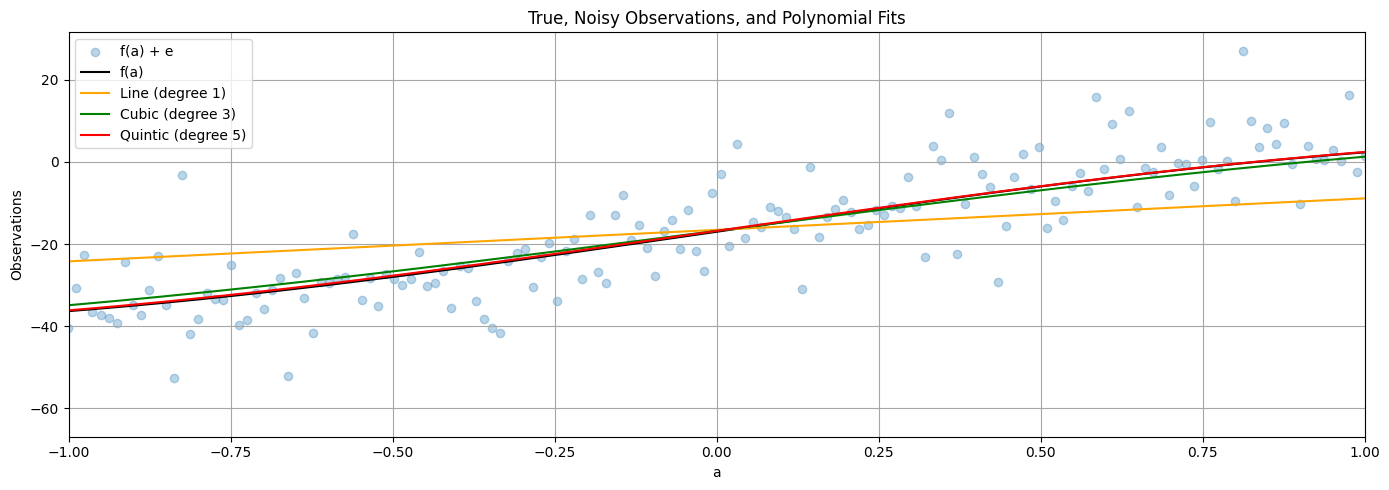

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
#step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# Degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# Degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)


# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw =line_uw = np.polyval(x_deg1[::-1], a)
cubic_uw =cubic_uw = np.polyval(x_deg3[::-1], a)
quintic_uw =quintic_uw = np.polyval(x_deg5[::-1], a)

# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Line plot for true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Plot the line polynomial (degree 1) with orange color
ax.plot(a, line_uw, label="Line (degree 1)", color='orange')

# Plot the cubic polynomial (degree 3) with green color
ax.plot(a, cubic_uw, label="Cubic (degree 3)", color='green')

# Plot the quintic polynomial (degree 5) with red color
ax.plot(a, quintic_uw, label="Quintic (degree 5)", color='red')

# Include axis labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True, Noisy Observations, and Polynomial Fits')

# Set the x-axis range from -1 to 1
ax.set_xlim(-1, 1)

# Include a legend for all plots
ax.legend()



ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()


# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A Posteriori Variance Factor for Line (Degree 1):", apv_deg1)
print("A Posteriori Variance Factor for Cubic (Degree 3):", apv_deg3)
print("A Posteriori Variance Factor for Quintic (Degree 5):", apv_deg5)


# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Compute the norm between the line (degree 1) predictions and the true observations
norm_line = np.linalg.norm(line_uw - l_true)
print("Norm between Line (Degree 1) predictions and true observations:", norm_line)

# Compute the norm between the cubic (degree 3) predictions and the true observations
norm_cubic = np.linalg.norm(cubic_uw - l_true)
print("Norm between Cubic (Degree 3) predictions and true observations:", norm_cubic)

# Compute the norm between the quintic (degree 5) predictions and the true observations
norm_quintic = np.linalg.norm(quintic_uw - l_true)
print("Norm between Quintic (Degree 5) predictions and true observations:", norm_quintic)




In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

print("The results highlight the advantages of using weighted least squares estimation in scenarios where observations have different levels of reliability. The weighted approach leads to more accurate and reliable model fitting, thereby improving the overall predictive performance of the model.")

The results highlight the advantages of using weighted least squares estimation in scenarios where observations have different levels of reliability. The weighted approach leads to more accurate and reliable model fitting, thereby improving the overall predictive performance of the model.


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

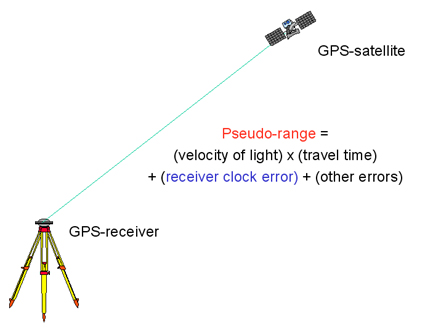

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [8]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange =pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx').drop("Satellite_ID",axis=1)

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()
print(df_sat_pos)

               x             y             z
0   5.280792e+06 -2.550146e+07  4.649508e+06
1  -2.159656e+06 -2.111602e+07  1.559791e+07
2   1.037185e+07 -2.171311e+07  1.055869e+07
3  -1.608576e+07  4.285071e+06  2.074204e+07
4  -1.431299e+07 -2.204501e+07  4.671208e+06
5  -2.435718e+06  1.625721e+07  2.109978e+07
6   1.591247e+07 -3.462515e+06  2.105363e+07
7   1.627185e+07 -2.187663e+05  2.103533e+07
8  -1.924704e+07 -7.259804e+06  1.647298e+07
9  -1.593115e+07  1.207737e+07  1.805808e+07
10 -7.680014e+06 -1.385546e+07  2.184298e+07


In [9]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [10]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
variance = 1  # given as 1 m^2
# Define the weight matrix P as an identity matrix scaled by the variance
P = np.identity(n)

In [11]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [12]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [13]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [14]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):

# Compute the difference between the receiver position and each satellite position
    # diff = satellite_pos[:, 1:4] - receiver_pos  # This will be an n x 3 array
    diff = satellite_pos - receiver_pos  # This will be an n x 3 array
    print(f"Diff array: n\{diff}")


    # Calculate the Euclidean distance (L2 norm) for each satellite
    distance = np.linalg.norm(diff, axis=1)  # Compute row-wise Euclidean distance
    print(distance)
#    distances = np.linalg.norm(satellite_pos - receiver_pos, axis=1)



    return distance

euclidean_norm(GroundTruth, sat_pos)


Diff array: n\[[  6914281.11804288 -21849832.93670967   -302973.33145001]
 [  -526166.67237928 -17464397.60951267  10645427.57757292]
 [ 12005341.54796995 -18061484.16727347   5606205.37857182]
 [-14452271.40151165   7936698.39862672  15789560.50514712]
 [-12679498.70095065 -18393387.08342177   -281273.22068388]
 [  -802228.80769578  19908832.31201363  16147297.91836112]
 [ 17545956.56654685    189111.86757761  16101146.63378582]
 [ 17905337.54356225   3432860.8621928   16082851.08421872]
 [-17613546.14899045  -3608176.49641879  11520500.28764872]
 [-14297662.65678055  15728994.43408823  13105595.14530122]
 [ -6046524.72876274 -10203835.54063167  16890493.75326202]]
[22919735.50416796 20459891.58181501 22400334.25542599 22829138.20273155
 22342011.77899318 25646450.14718576 23814770.16593441 24311391.26510924
 21353638.3890343  24971604.82362354 20638980.11687546]


array([22919735.50416796, 20459891.58181501, 22400334.25542599,
       22829138.20273155, 22342011.77899318, 25646450.14718576,
       23814770.16593441, 24311391.26510924, 21353638.3890343 ,
       24971604.82362354, 20638980.11687546])

In [15]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)

def create_design_matrix(r_pos, s_pos, rho):

# Number of satellites
    n = s_pos.shape[0]

    # Initialize the design matrix A with zeros
    A = np.zeros((n, 4))
    print(f"Design matrix before:\n {A}")

    # Loop through each satellite to fill in the design matrix A
    for i in range(n):
        # Compute the difference between the satellite position and the receiver position
        # diff = r_pos[:3] - s_pos[i, :3]    # Take only the first three elements (X, Y, Z)
        diff = r_pos - s_pos[i, :3]    # Take only the first three elements (X, Y, Z)


        # Compute the range rate (partial derivatives)
        # The derivative with respect to each state is normalized by the geometric distance
        # A[i, 0:3] = diff / rho[i]  # Normalizing by distance to get the gradient
        x,y,z  = diff / rho[i]
        # A[i] = diff / rho[i]
        # A[i, 3] = -1  ## step 8

        A[i] = [x,y,z, -1]
        print(f"Current A: {A}")

    print(f"Design matrix:\n {A}")
    print(f"Sat_pos matrix:\n {s_pos}")
    return A

create_design_matrix(GroundTruth[0],sat_pos,euclidean_norm(GroundTruth,sat_pos))
# print(GroundTruth)

Diff array: n\[[  6914281.11804288 -21849832.93670967   -302973.33145001]
 [  -526166.67237928 -17464397.60951267  10645427.57757292]
 [ 12005341.54796995 -18061484.16727347   5606205.37857182]
 [-14452271.40151165   7936698.39862672  15789560.50514712]
 [-12679498.70095065 -18393387.08342177   -281273.22068388]
 [  -802228.80769578  19908832.31201363  16147297.91836112]
 [ 17545956.56654685    189111.86757761  16101146.63378582]
 [ 17905337.54356225   3432860.8621928   16082851.08421872]
 [-17613546.14899045  -3608176.49641879  11520500.28764872]
 [-14297662.65678055  15728994.43408823  13105595.14530122]
 [ -6046524.72876274 -10203835.54063167  16890493.75326202]]
[22919735.50416796 20459891.58181501 22400334.25542599 22829138.20273155
 22342011.77899318 25646450.14718576 23814770.16593441 24311391.26510924
 21353638.3890343  24971604.82362354 20638980.11687546]
Design matrix before:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0.

array([[-0.30167369,  1.041372  , -0.27413046, -1.        ],
       [ 0.02571698,  0.95223063, -0.84220381, -1.        ],
       [-0.53594475,  0.89639832, -0.54428547, -1.        ],
       [ 0.6330625 , -0.25925467, -0.98013036, -1.        ],
       [ 0.56751822,  0.91359386, -0.28219025, -1.        ],
       [ 0.03128031, -0.69758951, -0.88640996, -1.        ],
       [-0.73676783,  0.07680217, -0.95264903, -1.        ],
       [-0.73649991, -0.05819178, -0.93243623, -1.        ],
       [ 0.82484988,  0.2634827 , -0.84793378, -1.        ],
       [ 0.57255682, -0.54905789, -0.7885583 , -1.        ],
       [ 0.29296626,  0.59217913, -1.13748182, -1.        ]])

In [16]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
# Define convergence criteria and maximum iteration count
threshold = 0.001


while np.linalg.norm(delta[:3]) >= threshold:  # Only check for x, y, z corrections

        # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)
#        rho = euclidean_norm(GroundTruth[0], sat_pos)
       print(f"Rho:\n {rho}")


       # compute the design matrix A
       # (1 marks)
       # A = create_design_matrix(GroundTruth[0], sat_pos, rho)
       A = create_design_matrix(x_hat[:3], sat_pos, rho)


       # compute the misclosure array w
       # (1 marks)
       # w = pseudorange[:, 1] - (rho + x_hat[3])
       w = pseudorange[:, 1] - (rho)



       print(f"Misclosure, w : {w}")
       # w = pseudorange[:, 1] - rho


       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # Residuals
       residuals = w - (A @ delta)

       # update the states
       # (1 marks)
       x_hat = x_0 + delta

       # Update initial values
       x_0 = x_hat


       # compute the position error from using the updated states against groundtruth
       # (1 marks)

       err_pos = np.linalg.norm(GroundTruth - x_hat[:3])


       # update the counter i, (i.e., increment of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)
#        residuals.append(v)





# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
arr_err_pos = np.array(arr_err_pos)
arr_err_pos = np.reshape(arr_err_pos,(len(arr_err_pos),1))

apv = (w.T @ P @ w) / (n - m)

residuals = np.array(residuals)
print(f"residuals: {residuals}")

# apv2 = (1/ n - m) * residuals.T@ P @ residuals

# print(f"Residuals shape:\n {arr_err_pos}")

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

Diff array: n\[[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035.5286677   -7259803.67892242  16472981.9071979 ]
 [-15931152.0364578   12077367.2515846   18058076.7648504 ]
 [ -7680014.10843999 -13855462.7231353   21842975.3728112 ]]
[26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740.72663527 26595227.45399327
 26353600.49429986 26939906.11311798 26982810.03000365]
Rho:
 [26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 2661674

In [17]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""

print("Estimated States (x_hat):")
print(x_hat)

print("\nCorrections Array (delta):")
print(delta)

# Calculate estimated measurements residuals (v) if not already calculated
v = w - A @ delta

print("\nEstimated Measurements Residuals (v):")
print(v)

print("\nA Posteriori Variance of Unit Weight (APV):")
print(apv)

print("\nCovariance Matrix of Estimated States (C_x_hat):")
print(C_x_hat)

print("\nNumber of Iterations:")
print(i)

# Calculate and print the final 3-D position error (assuming GroundTruth is provided)
final_err_pos = np.linalg.norm(x_hat[:3] - GroundTruth[:3])
print("\n3-D Position Error:")
print(final_err_pos)




Estimated States (x_hat):
[-1633492.44451686 -3651629.54237943  4952485.43270835 -1266156.46031267]

Corrections Array (delta):
[ 3.22969020e-06  6.39415364e-06 -1.75956594e-05 -6.47201389e+00]

Estimated Measurements Residuals (v):
[ 0.25997571  0.11117279 -1.09950209 -0.00500054  0.20031684 -1.41815427
 -0.09126721  1.5120914   0.26365487  0.61138618 -0.34467368]

A Posteriori Variance of Unit Weight (APV):
66.70786239405479

Covariance Matrix of Estimated States (C_x_hat):
[[ 21.32317253   4.6470333   -5.64161838   4.87426443]
 [  4.6470333   28.38210978 -38.76203647  24.56574422]
 [ -5.64161838 -38.76203647 136.45770908 -73.64685924]
 [  4.87426443  24.56574422 -73.64685924  46.64596428]]

Number of Iterations:
5

3-D Position Error:
5.431614720639106


In [18]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
print('The A Posteriori Variance of Unit Weight (APV) is 66.7079, which is much higher than 1, indicating that the model fit is not ideal and that the observed data is likely noisier than expected. This suggests possible model inaccuracies or incorrect weighting of observations.')

print('The Covariance Matrix shows the uncertainties and relationships between the estimated states. The diagonal values indicate varying degrees of uncertainty in each state, with the third state having particularly high uncertainty. Non-zero off-diagonal elements indicate correlations between the estimates, meaning errors in one parameter may affect others. Overall, the high APV and variances suggest significant uncertainties in the model estimates.')


The A Posteriori Variance of Unit Weight (APV) is 66.7079, which is much higher than 1, indicating that the model fit is not ideal and that the observed data is likely noisier than expected. This suggests possible model inaccuracies or incorrect weighting of observations.
The Covariance Matrix shows the uncertainties and relationships between the estimated states. The diagonal values indicate varying degrees of uncertainty in each state, with the third state having particularly high uncertainty. Non-zero off-diagonal elements indicate correlations between the estimates, meaning errors in one parameter may affect others. Overall, the high APV and variances suggest significant uncertainties in the model estimates.


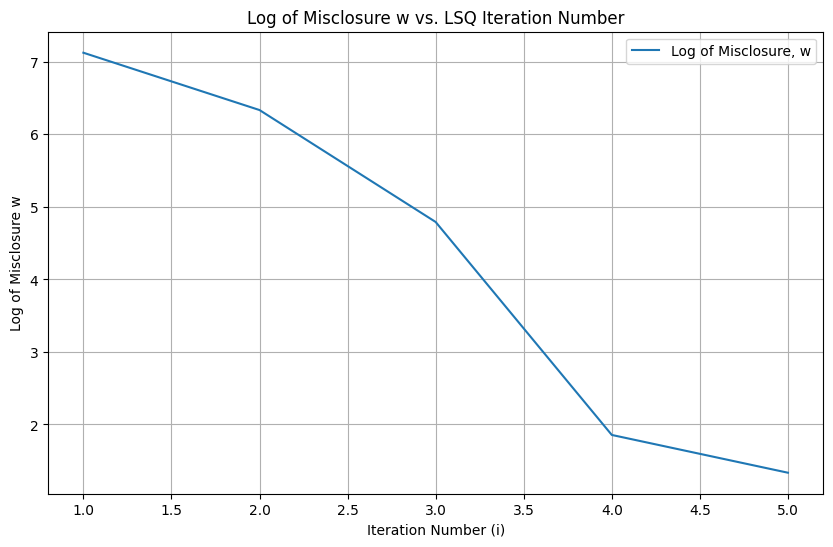

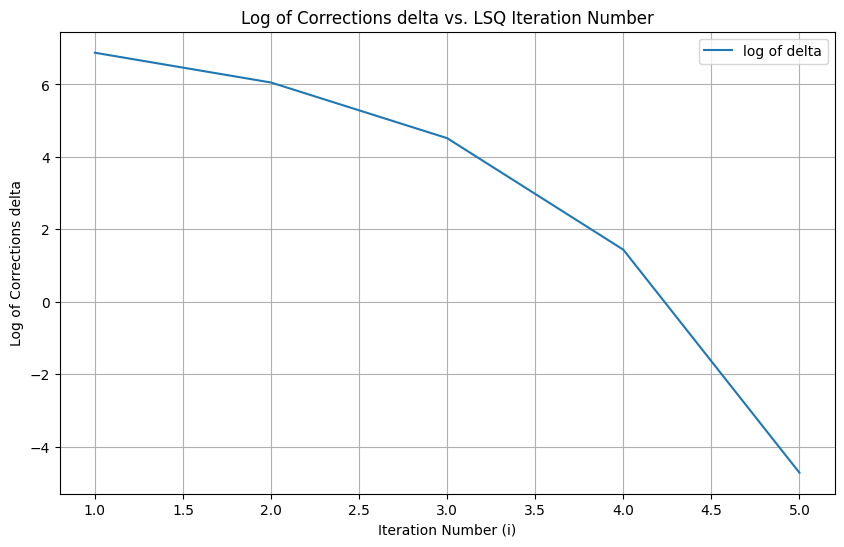

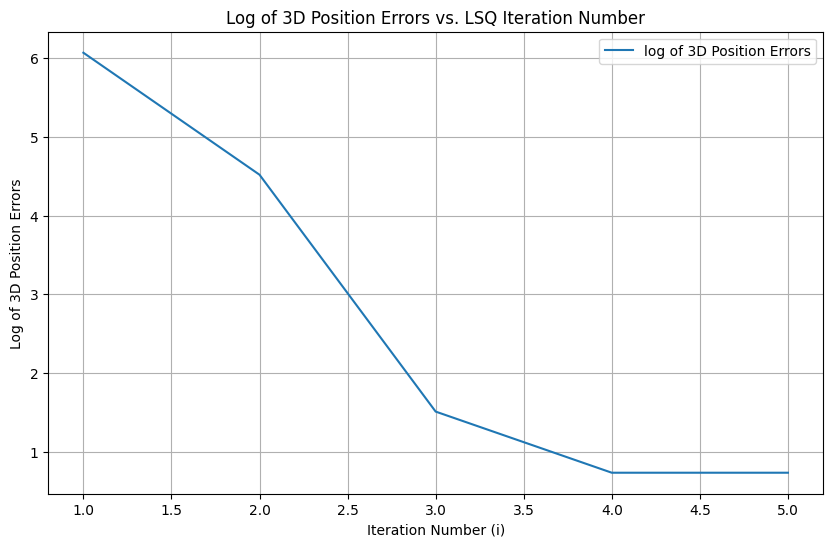

In [19]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
# Compute log of misclosure w
log_w_array = np.log10([np.linalg.norm(w) for w in arr_w])

plt.figure(figsize=(10, 6))
plt.plot(arr_i, log_w_array, label='Log of Misclosure, w')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure w')
plt.title('Log of Misclosure w vs. LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
log_delta_array = np.log10([np.linalg.norm(delta[:3]) for delta in arr_delta])

plt.figure(figsize=(10, 6))
plt.plot(arr_i, log_delta_array, label='log of delta')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Corrections delta')
plt.title('Log of Corrections delta vs. LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()



# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

# Compute log of 3D position errors
position_error_log_arr = np.log10(arr_err_pos)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, position_error_log_arr, label='log of 3D Position Errors')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs. LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
print('Misclosure w Plot: Shows a decreasing trend, indicating that discrepancies between observed and computed values reduce as the iterations progress, signifying better model convergence.')

print('Corrections delta Plot: Decreases with each iteration, approaching zero, meaning that the model requires smaller adjustments as it gets closer to the accurate solution.')

print ('3D Position Errors Plot: Shows a decrease and then flattens, reflecting that the positional accuracy improves with each iteration until reaching a stable solution, with minimal further gains.')

print('All plots demonstrate that the LSQ iterative process improves estimation accuracy and converges towards an optimal solution.')

Misclosure w Plot: Shows a decreasing trend, indicating that discrepancies between observed and computed values reduce as the iterations progress, signifying better model convergence.
Corrections delta Plot: Decreases with each iteration, approaching zero, meaning that the model requires smaller adjustments as it gets closer to the accurate solution.
3D Position Errors Plot: Shows a decrease and then flattens, reflecting that the positional accuracy improves with each iteration until reaching a stable solution, with minimal further gains.
All plots demonstrate that the LSQ iterative process improves estimation accuracy and converges towards an optimal solution.


In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
